In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
# Normalize and reshape the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [9]:
# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten layer to convert 28x28 images to a flat vector
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2728 - accuracy: 0.9208 - val_loss: 0.1413 - val_accuracy: 0.9589
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1115 - accuracy: 0.9671 - val_loss: 0.1238 - val_accuracy: 0.9628
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.1136 - val_accuracy: 0.9680
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.1056 - val_accuracy: 0.9711
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.1127 - val_accuracy: 0.9703
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.1057 - val_ac

In [12]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.1184 - accuracy: 0.9724
Test accuracy: 97.24%


In [13]:
# Make predictions
predictions = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


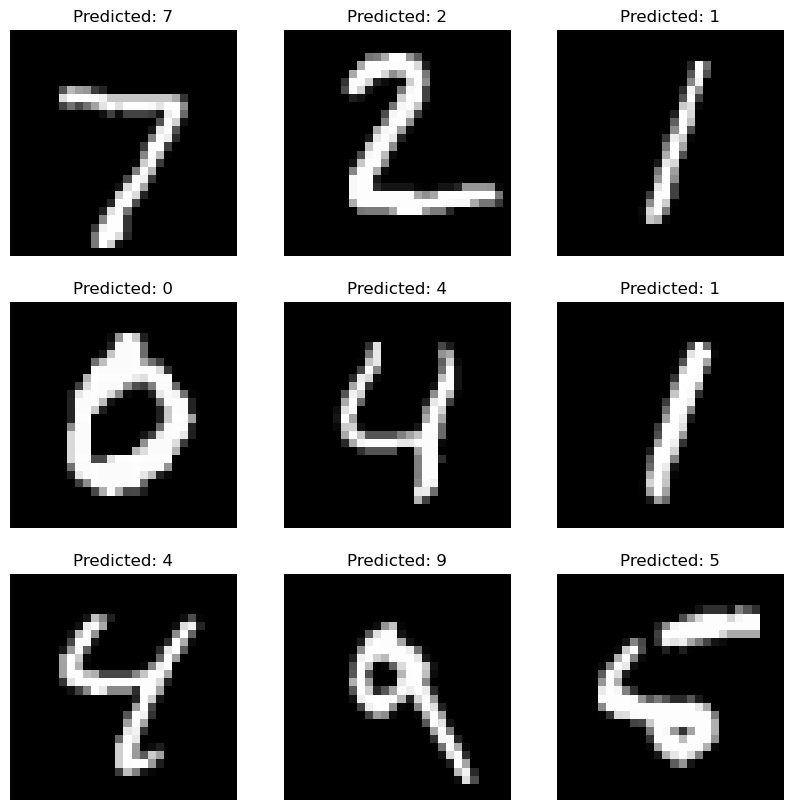

In [14]:
# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()